In [1]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# tinh trung binh luong gioi thinh song sot
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [6]:
train.pivot_table('Survived',index = 'Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [7]:
# phan chia danh gio nguoi tu 0 den 18 tuoi, nguoi tu 18 den 80 tuoi
Age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex',Age] ,'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [8]:
# so gia tri bi khuyet
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

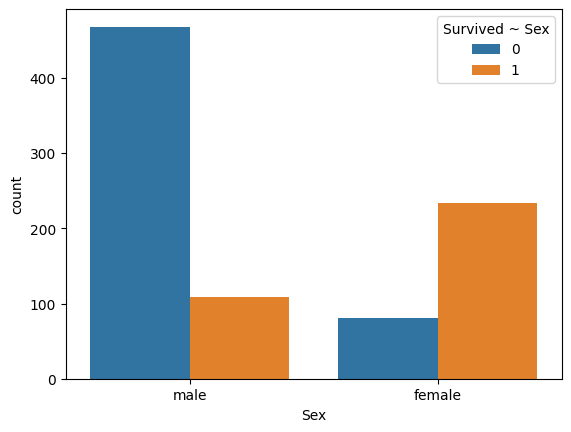

In [9]:
# ve do thi bieu thi su lien quan giua gioi tinh va survived
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'Sex', hue = "Survived", data = train)
plt.legend(loc = "upper right", title = "Survived ~ Sex")

<Axes: xlabel='Sex', ylabel='Age'>

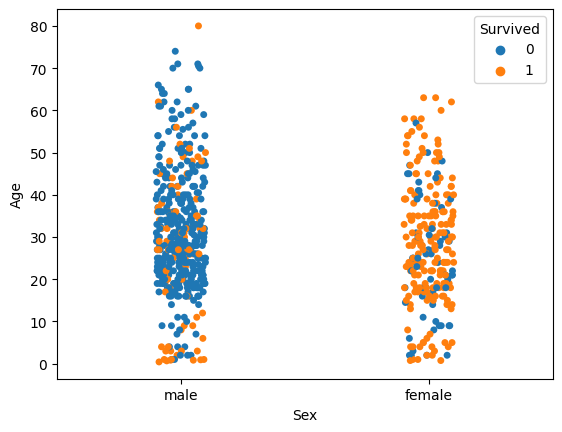

In [10]:
sns.stripplot(x = 'Sex', y = "Age", data = train, hue = 'Survived')

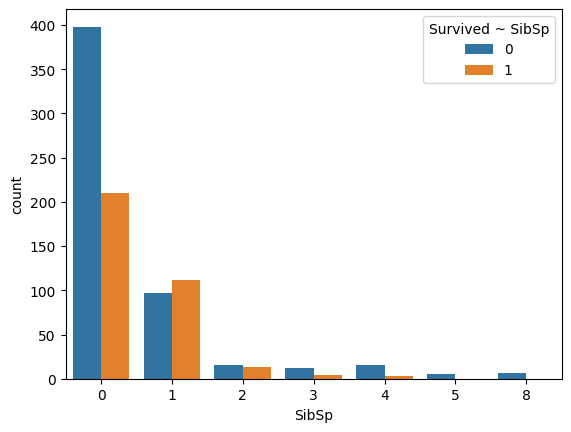

In [11]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
plt.legend(loc = 'upper right', title  = 'Survived ~ SibSp')

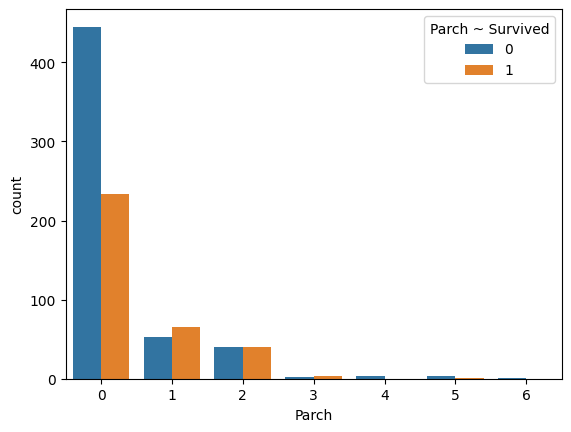

In [12]:
# bieu do the hien su tuong qua giua bo, me / con voi Survived
sns.countplot(x = 'Parch', hue = 'Survived', data = train)
plt.legend(loc = 'upper right', title = 'Parch ~ Survived')

In [13]:
import numpy as np
train['alone'] = np.where((train['SibSp'] + train['Parch']) > 0, 0 , 1)
train.drop(['Parch', 'SibSp'], axis = 1, inplace = True)

In [14]:
train.drop('Ticket', axis = 1 , inplace = True)

In [15]:
train.drop(['PassengerId', 'Name', 'Cabin', 'Embarked'], axis =1, inplace = True)

In [16]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'alone'], dtype='object')

In [17]:
# tim su tuong quan giua cac giu lieu
train.corr()

<ipython-input-17-d330c4fa0878>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Survived,Pclass,Age,Fare,alone
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.203367
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.135207
Age,-0.077221,-0.369226,1.000000,0.096067,0.198270
Fare,0.257307,-0.549500,0.096067,1.000000,-0.271832
alone,-0.203367,0.135207,0.198270,-0.271832,1.000000


array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='alone', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='alone', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='alone', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='Fare'>,
        <Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='Age', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='alone', ylabel='Fare'>],
       [<Axes: xlabel='Surv

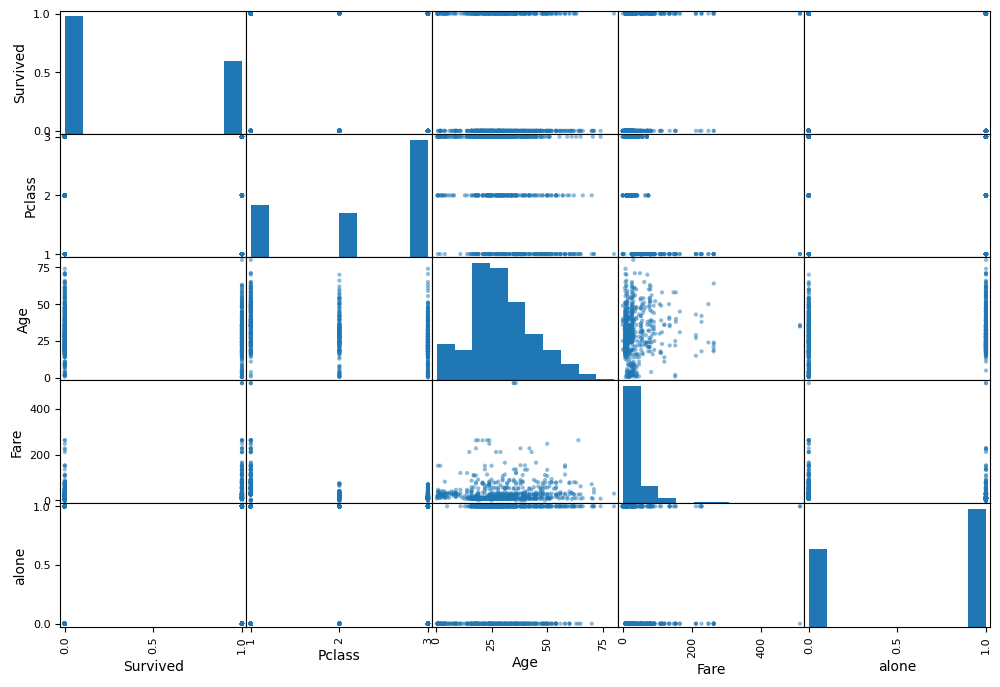

In [18]:
# co cach khac de tim su tuong quan cua cac thuoc tinh
from pandas.plotting import scatter_matrix
attributes = ['Survived', 'Pclass', 'Age', 'Fare', 'alone']
scatter_matrix(train[attributes], figsize =(12,8))

In [19]:
# thay the cac cot bi thieu trong age bang tuoi trung vi
trainMedian = train['Age'].median()
train['Age'].fillna(trainMedian, inplace = True)

In [20]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
training = pd.get_dummies(train, columns = ['Pclass', 'Sex'], drop_first = True)
training

,Survived,Age,Fare,alone,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,0,0,0,0
2,1,26.0,7.9250,1,0,1,0
3,1,35.0,53.1000,0,0,0,0
4,0,35.0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,1
887,1,19.0,30.0000,1,0,0,0
888,0,28.0,23.4500,0,0,1,0
889,1,26.0,30.0000,1,0,0,1


In [23]:
# chuan hoa du lieu
from sklearn.preprocessing import StandardScaler
train_standard = StandardScaler()
train_copied = training.copy()
train_standard.fit(train_copied[['Age', 'Fare']])
train_std = pd.DataFrame(train_standard.transform(train_copied[['Age', 'Fare']]))
train_std

,0,1
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337
...,...,...
886,-0.181487,-0.386671
887,-0.796286,-0.044381
888,-0.104637,-0.176263
889,-0.258337,-0.044381


In [24]:
training[['Age', 'Fare']] = train_std
training

,Survived,Age,Fare,alone,Pclass_2,Pclass_3,Sex_male
0,0,-0.565736,-0.502445,0,0,1,1
1,1,0.663861,0.786845,0,0,0,0
2,1,-0.258337,-0.488854,1,0,1,0
3,1,0.433312,0.420730,0,0,0,0
4,0,0.433312,-0.486337,1,0,1,1
...,...,...,...,...,...,...,...
886,0,-0.181487,-0.386671,1,1,0,1
887,1,-0.796286,-0.044381,1,0,0,0
888,0,-0.104637,-0.176263,0,0,1,0
889,1,-0.258337,-0.044381,1,0,0,1


In [25]:
col = ['Age', 'Fare', 'alone', 'Pclass_2', 'Pclass_3', 'Sex_male']
x = training[col]
y = training['Survived']

In [26]:
# su dung cac mo hinh tiem nang de train model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x, y)


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score
y_pre1 = log_reg.predict(x)
accuracy_score(y_pre1, y)

0.7934904601571269

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x, y)

RandomForestClassifier()

In [29]:
y_pre2 = rfc.predict(x)
accuracy_score(y_pre2, y)


0.9797979797979798

In [45]:
# du doan tren tap test
test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
test.drop(['PassengerId', 'Name', 'Cabin', 'Embarked'], axis =1, inplace = True)

In [49]:
TrainMedian = train['Age'].median()
TrainMedian

28.0

In [50]:
test["Age"].fillna(TrainMedian, inplace=True)
test["Fare"].fillna(train.Fare.median(), inplace=True)
test['Alone']=np.where((test["SibSp"]+test["Parch"])>0, 0, 1)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
testing=pd.get_dummies(test, columns=["Pclass","Sex"], drop_first=True)
testing

,Age,Ticket,Fare,Alone,Pclass_2,Pclass_3,Sex_male
0,34.5,330911,7.8292,1,0,1,1
1,47.0,363272,7.0000,0,0,1,0
2,62.0,240276,9.6875,1,1,0,1
3,27.0,315154,8.6625,1,0,1,1
4,22.0,3101298,12.2875,0,0,1,0
...,...,...,...,...,...,...,...
413,28.0,A.5. 3236,8.0500,1,0,1,1
414,39.0,PC 17758,108.9000,1,0,0,0
415,38.5,SOTON/O.Q. 3101262,7.2500,1,0,1,1
416,28.0,359309,8.0500,1,0,1,1


In [51]:
test_copied = testing.copy()
test_std = train_standard.transform(test_copied[['Age','Fare']])
testing[['Age','Fare']] = test_std
testing

,Age,Ticket,Fare,Alone,Pclass_2,Pclass_3,Sex_male
0,0.394887,330911,-0.490783,1,0,1,1
1,1.355510,363272,-0.507479,0,0,1,0
2,2.508257,240276,-0.453367,1,1,0,1
3,-0.181487,315154,-0.474005,1,0,1,1
4,-0.565736,3101298,-0.401017,0,0,1,0
...,...,...,...,...,...,...,...
413,-0.104637,A.5. 3236,-0.486337,1,0,1,1
414,0.740711,PC 17758,1.544246,1,0,0,0
415,0.702286,SOTON/O.Q. 3101262,-0.502445,1,0,1,1
416,-0.104637,359309,-0.486337,1,0,1,1
